In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [24]:
import bz2
import os
import ujson
import attr

import pandas as pd
import numpy as np

from glob import glob
from tqdm import tqdm_notebook
from itertools import islice
from collections import OrderedDict, defaultdict

In [3]:
@attr.s
class Dataset:
    
    root = attr.ib()
    
    def paths(self):
        return glob(os.path.join(self.root, '*.bz2'))
    
    def novels(self):
        for path in tqdm_notebook(self.paths()):
            with bz2.open(path) as fh:
                for line in fh:
                    yield ujson.loads(line)

In [7]:
ds = Dataset('../../data/a-the-and-or-200.json/')

In [8]:
novel = next(ds.novels())

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

In [12]:
tokens = list(novel['counts'].keys())

In [27]:
tc = defaultdict(list)
for novel in ds.novels():
    for t, c in novel['counts'].items():
        tc[t].append(c)

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

been


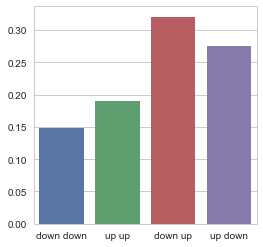

year


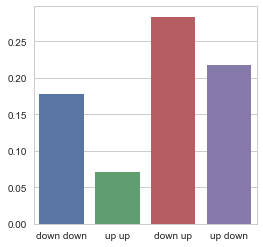

about


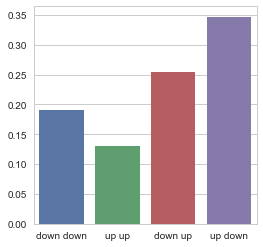

your


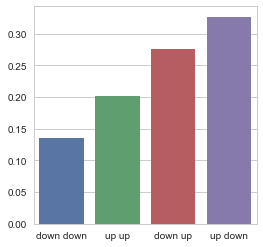

these


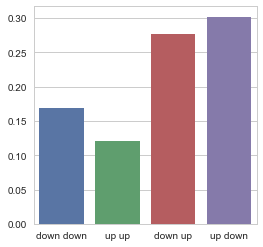

music


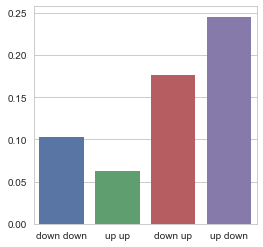

would


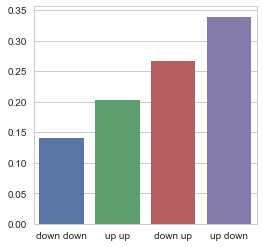

jan


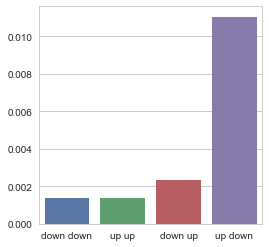

state


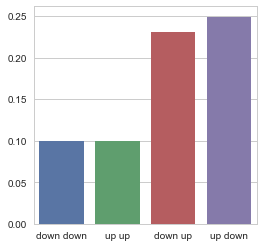

you


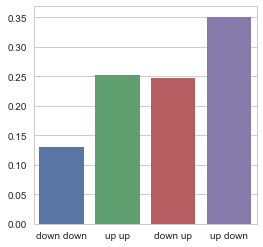

they


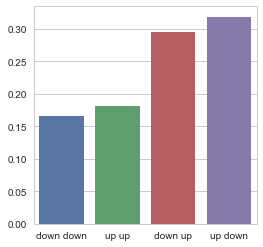

them


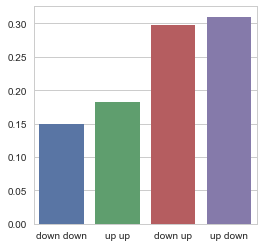

then


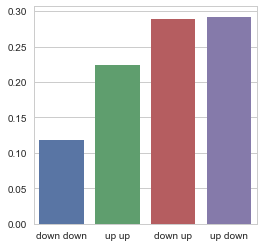

am


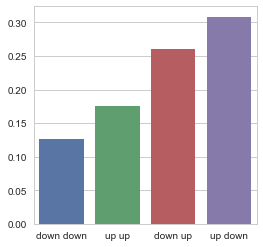

click


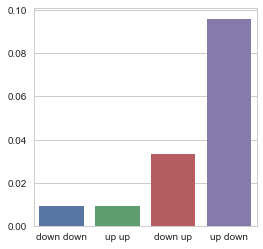

an


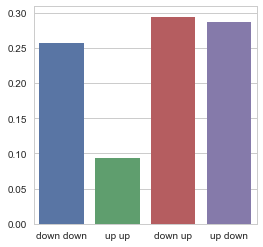

each


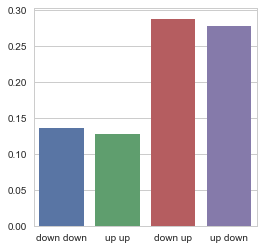

as


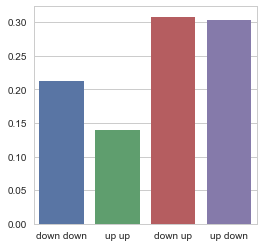

re


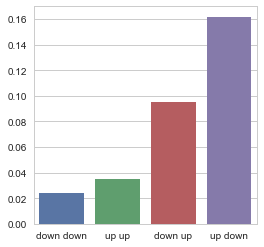

at


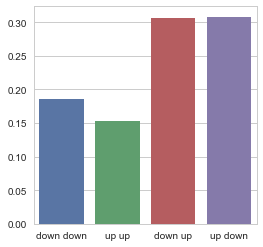

items


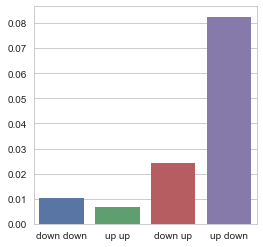

be


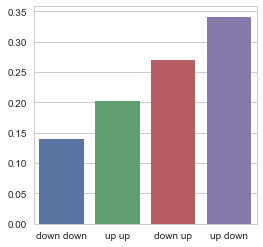

two


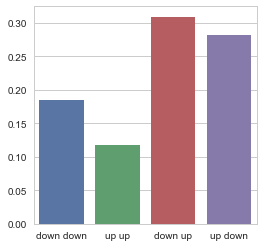

how


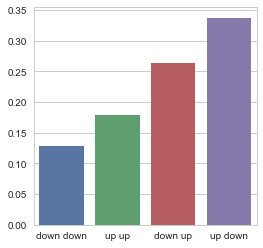

into


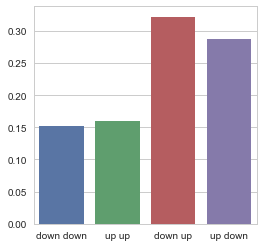

see


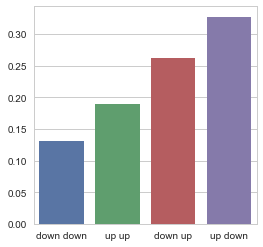

search


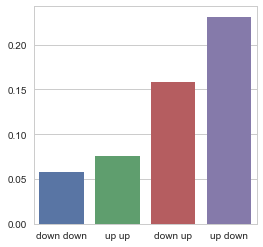

are


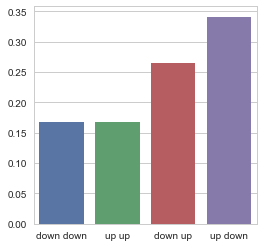

does


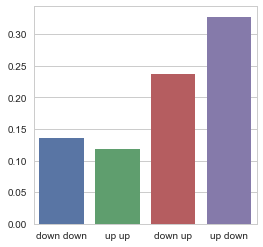

by


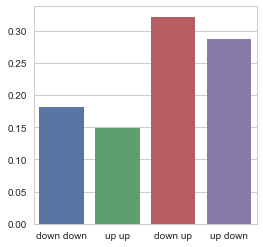

where


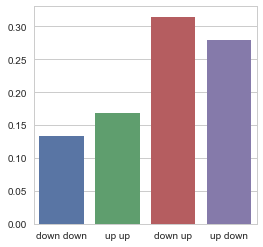

after


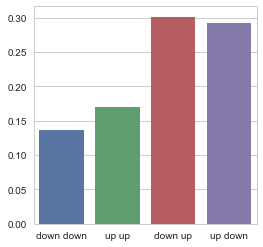

free


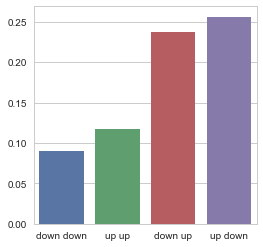

so


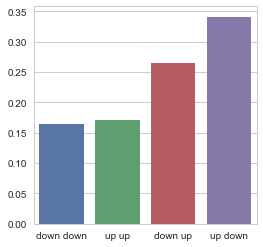

email


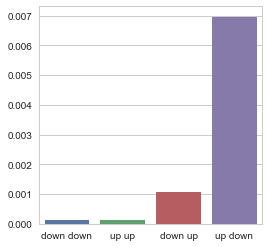

policy


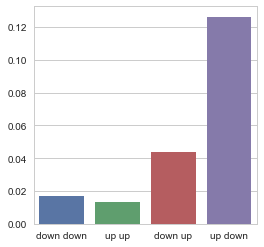

a


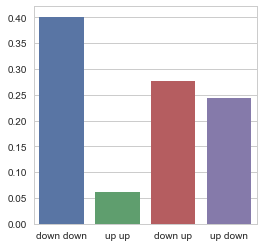

b


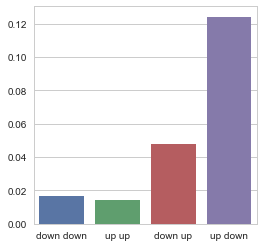

set


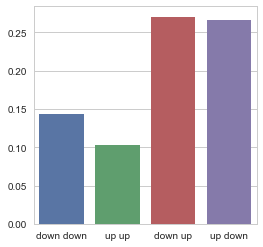

c


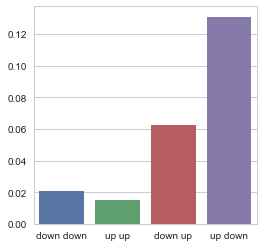

business


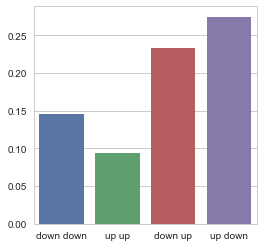

d


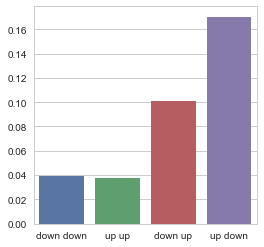

e


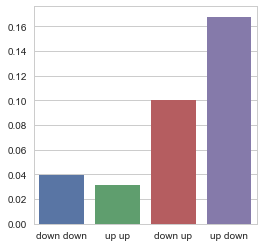

one


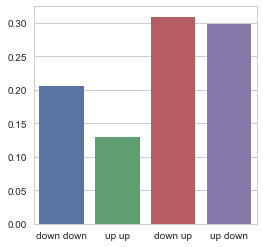

sex


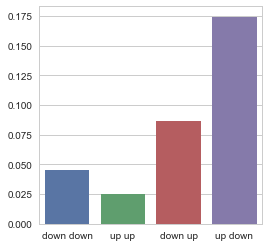

i


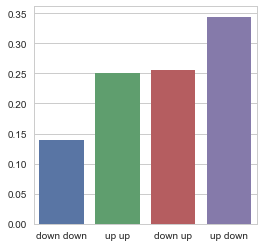

services


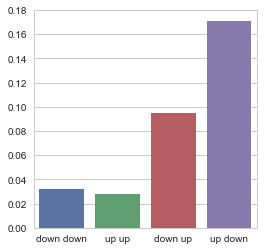

many


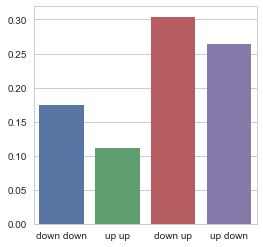

m


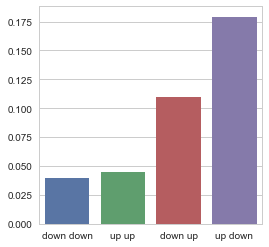

people


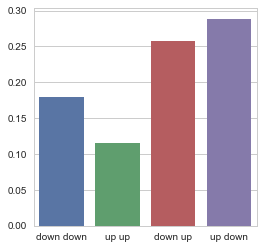

n


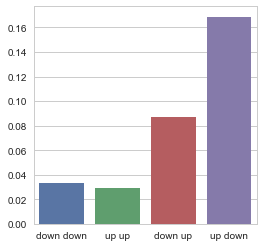

the


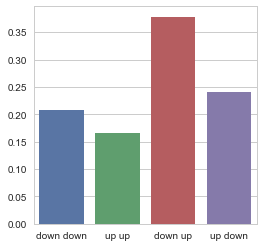

such


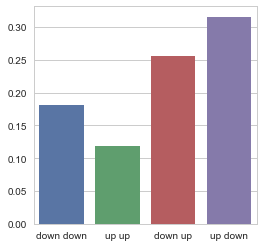

r


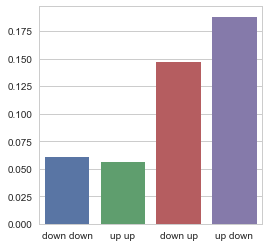

s


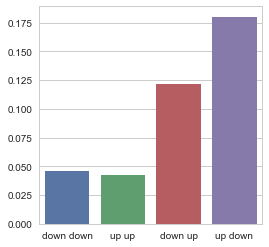

t


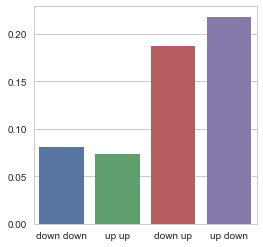

x


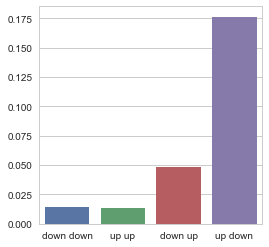

information


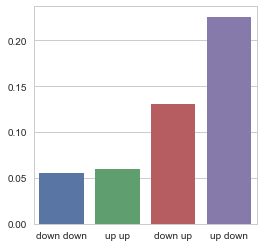

to


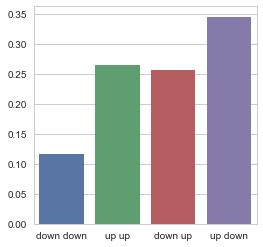

under


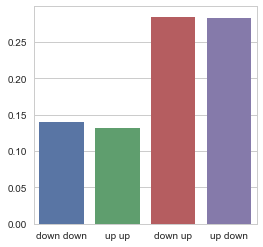

but


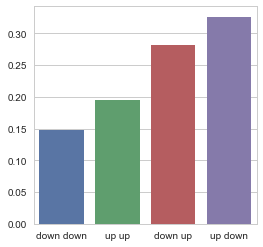

through


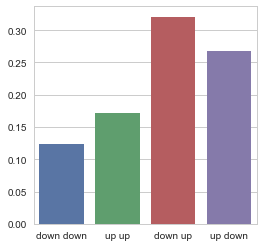

de


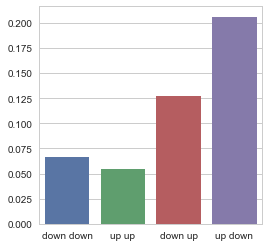

buy


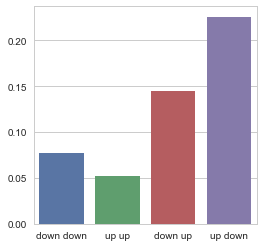

available


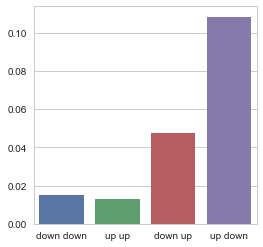

had


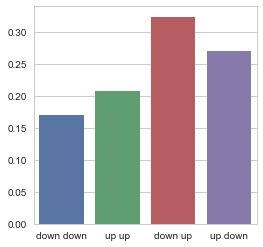

do


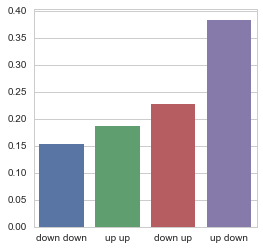

good


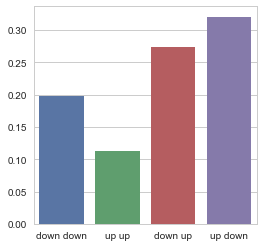

research


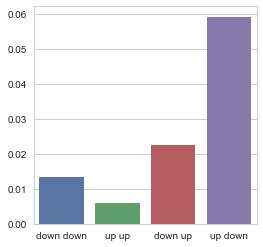

view


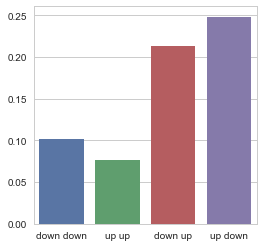

post


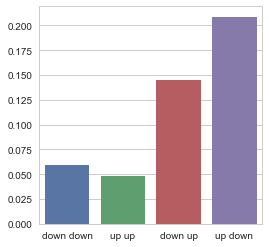

school


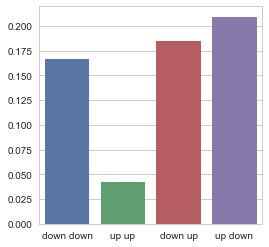

contact


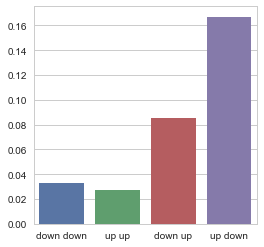

up


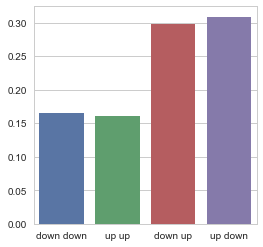

has


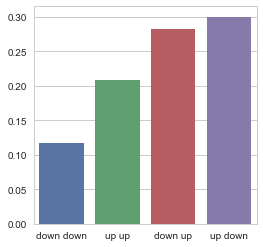

us


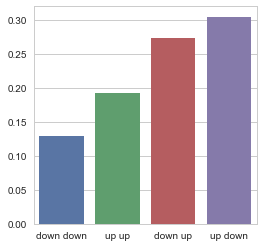

info


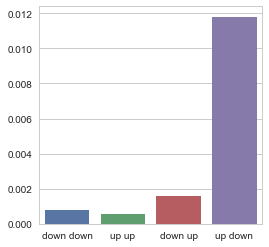

add


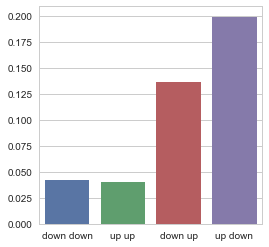

which


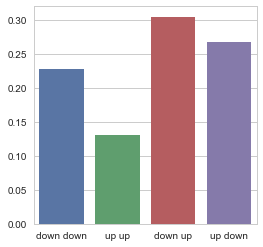

last


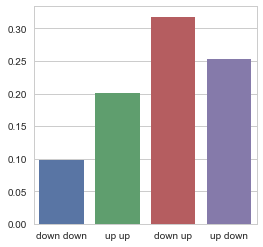

need


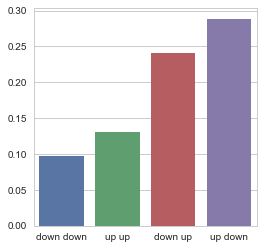

this


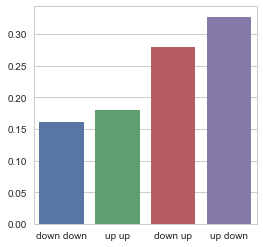

its


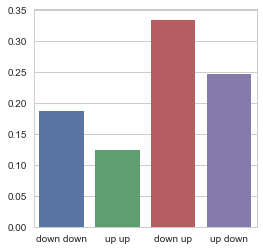

please


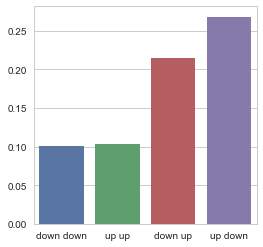

list


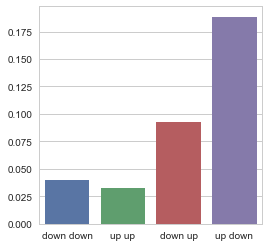

she


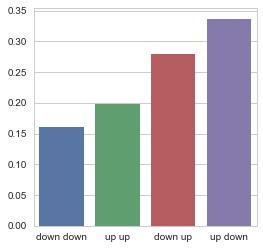

name


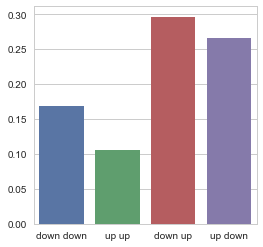

page


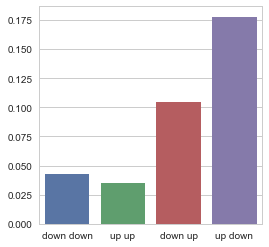

support


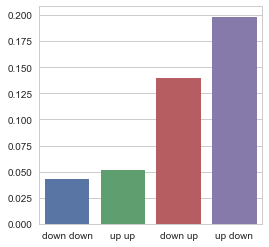

full


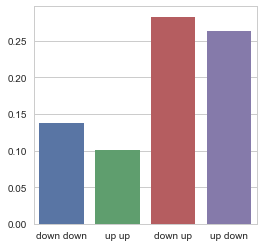

next


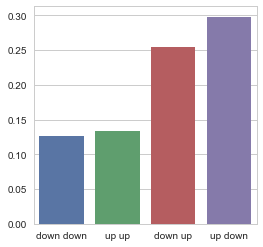

some


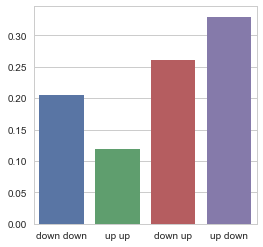

book


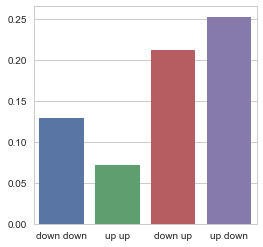

for


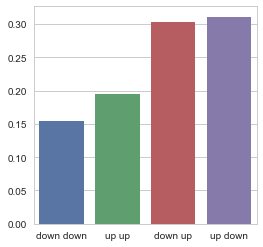

back


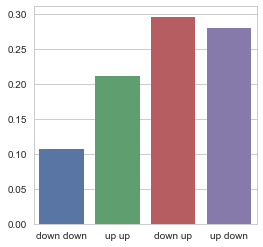

privacy


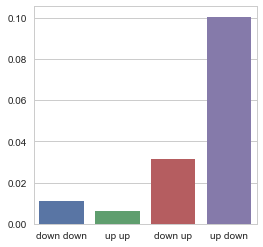

video


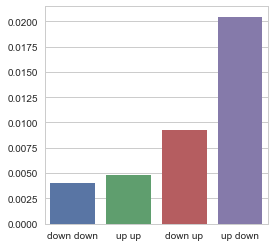

life


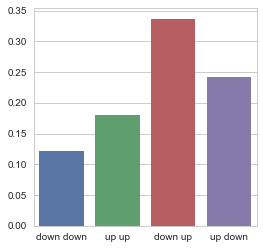

we


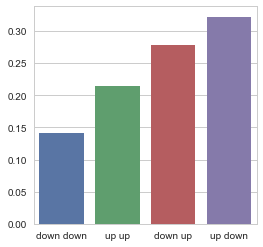

not


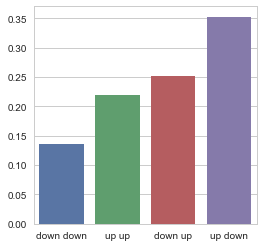

now


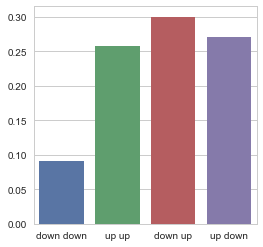

company


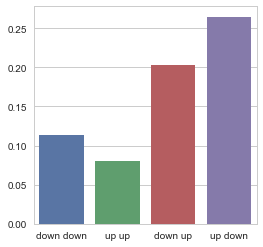

just


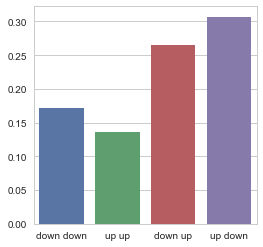

news


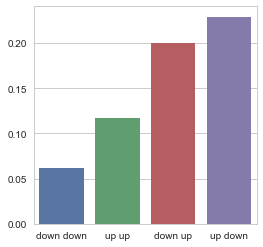

over


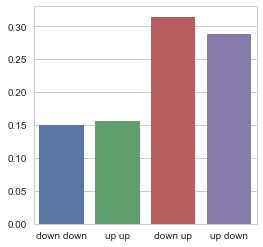

go


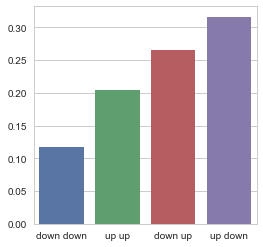

was


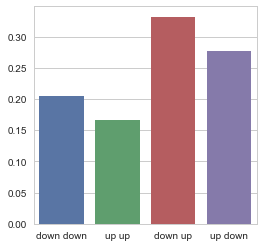

message


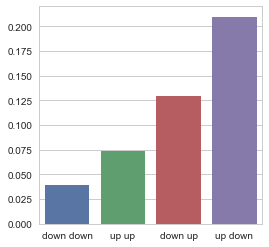

home


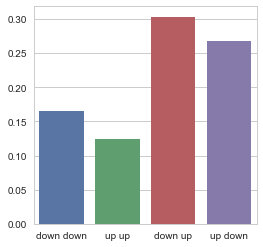

with


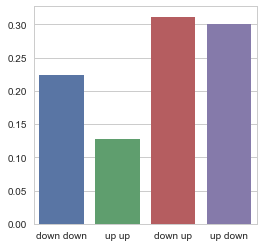

what


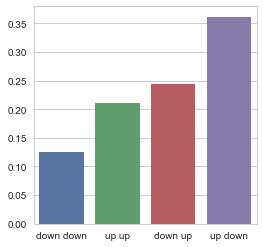

service


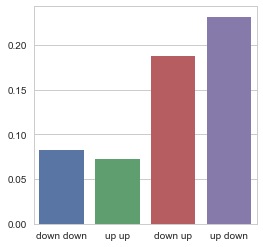

there


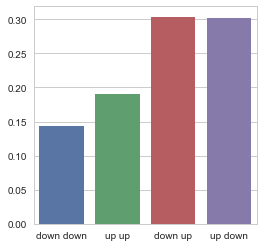

well


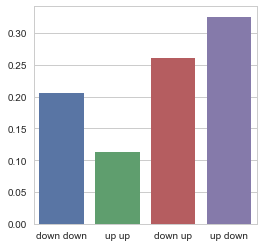

time


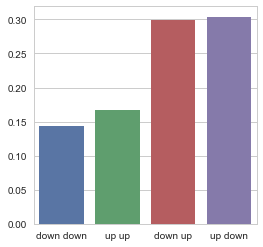

he


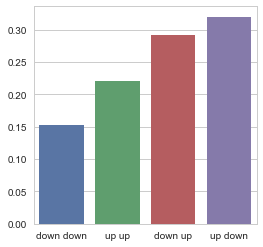

very


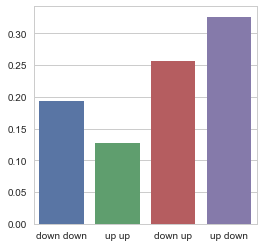

copyright


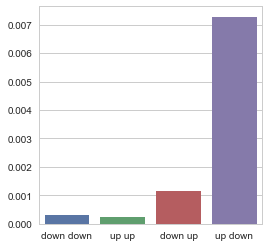

software


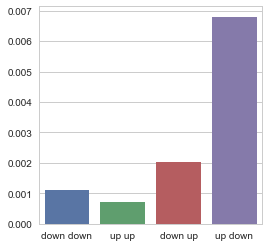

program


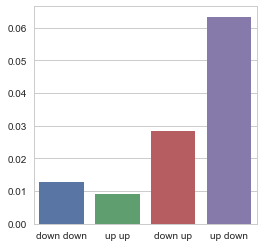

when


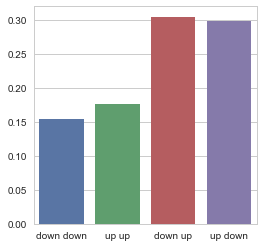

years


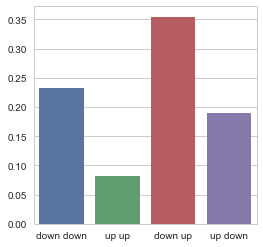

number


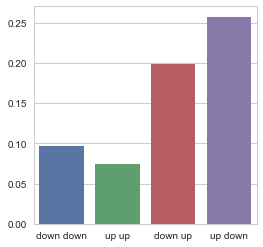

her


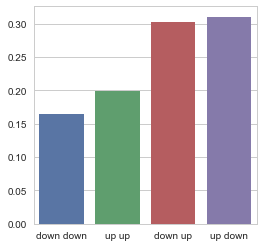

review


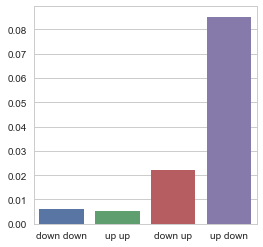

price


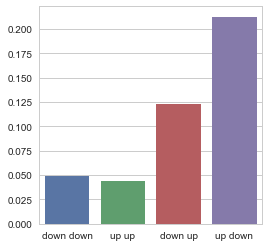

if


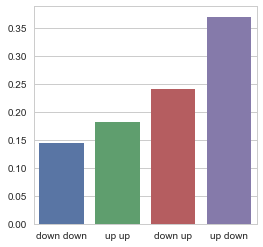

order


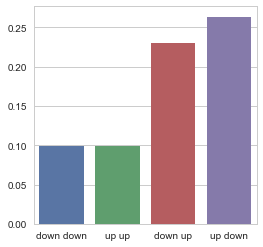

in


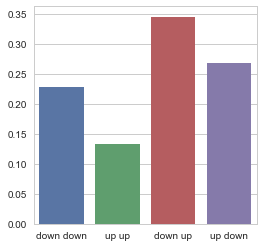

work


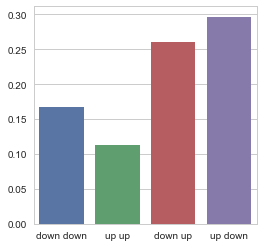

is


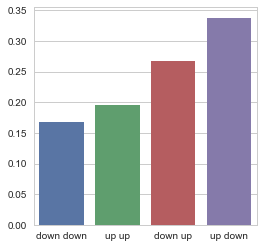

it


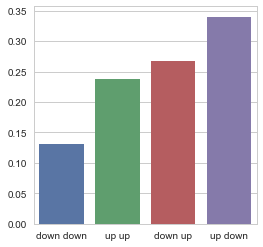

books


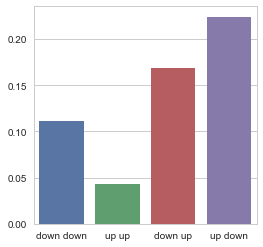

system


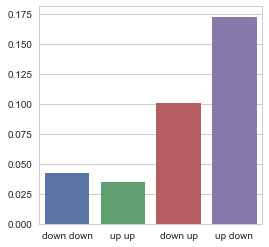

other


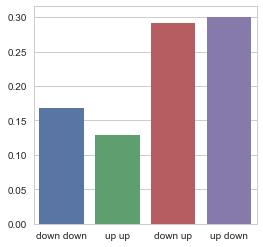

city


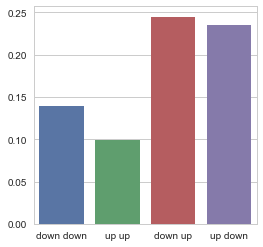

our


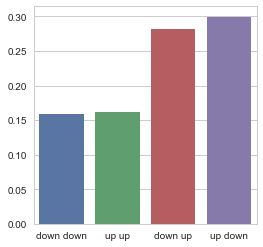

products


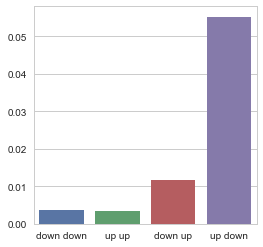

out


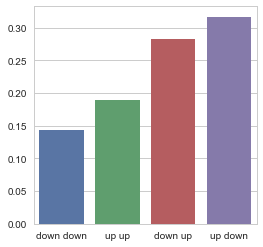

world


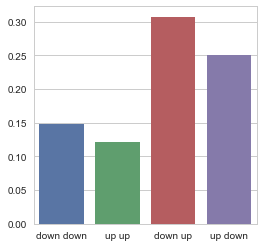

top


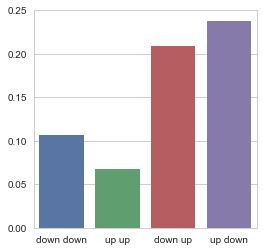

web


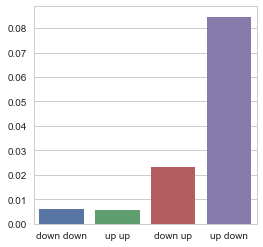

get


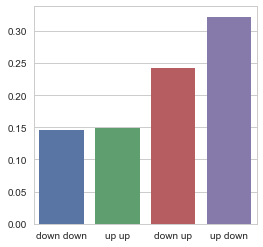

rights


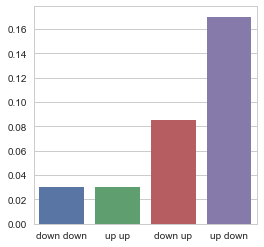

have


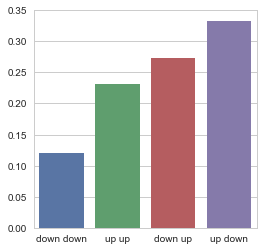

map


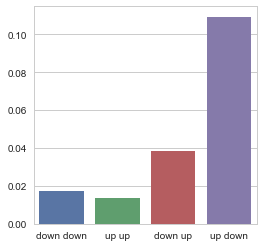

product


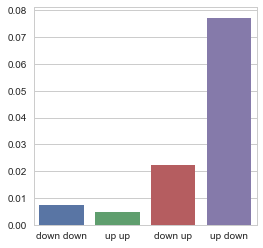

may


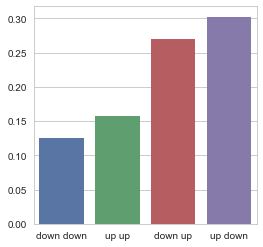

more


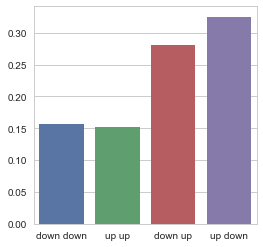

health


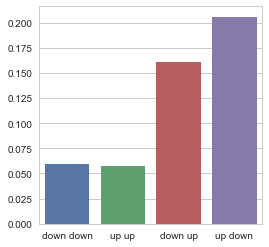

help


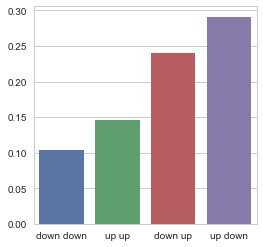

site


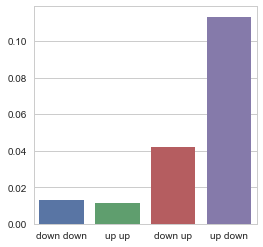

january


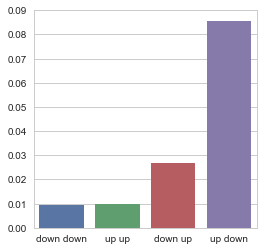

first


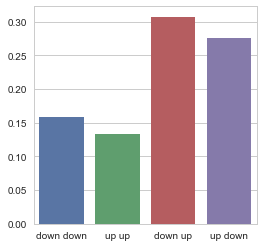

date


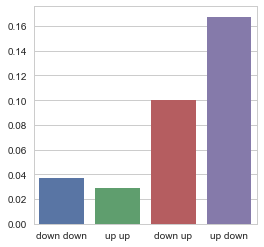

mail


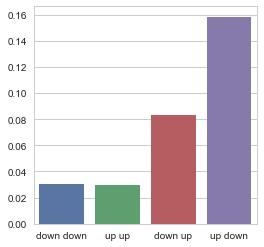

data


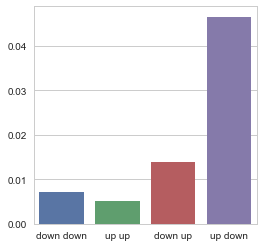

use


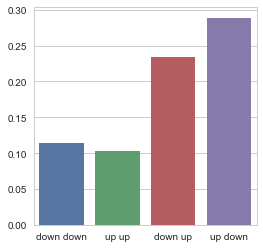

used


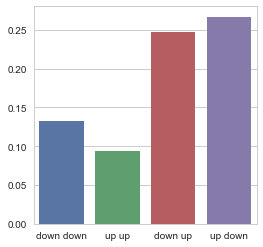

that


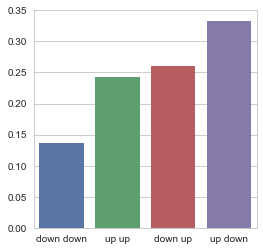

high


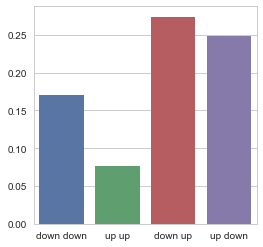

his


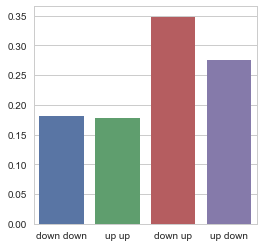

reviews


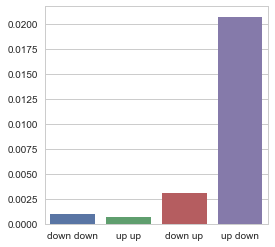

find


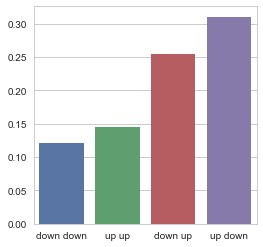

than


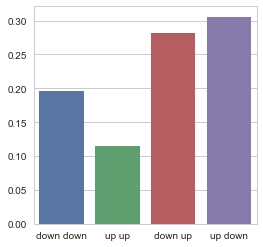

me


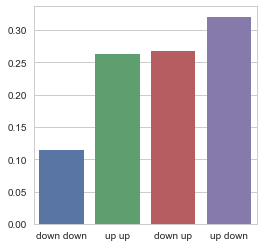

should


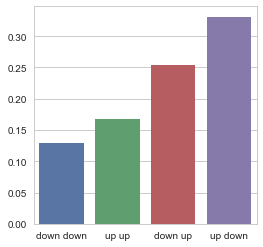

only


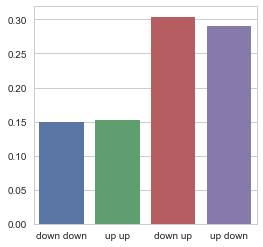

from


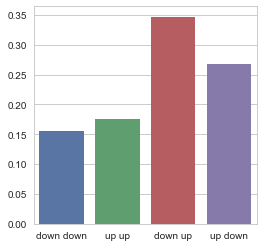

links


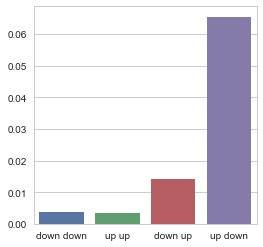

day


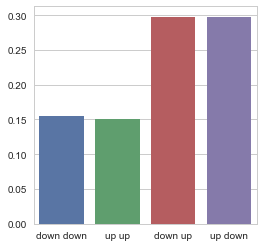

group


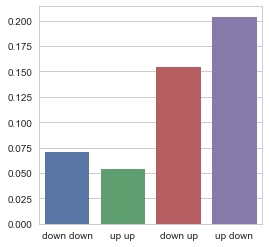

all


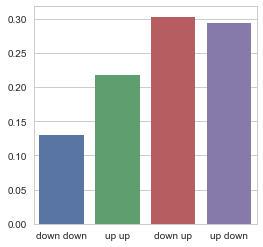

new


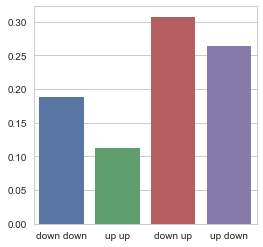

read


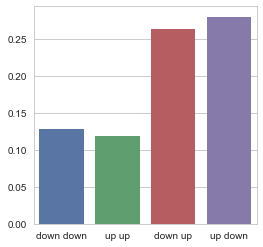

like


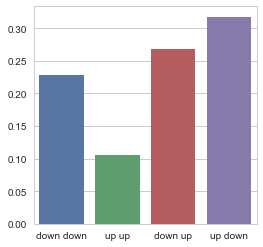

my


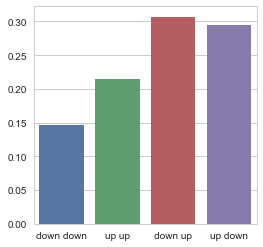

most


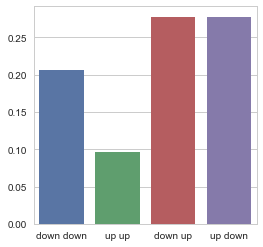

were


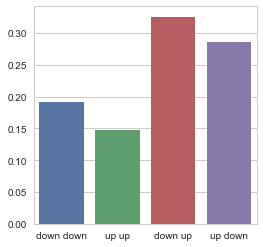

who


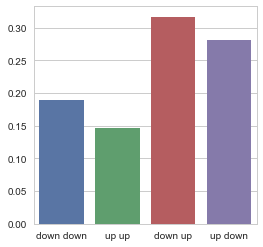

here


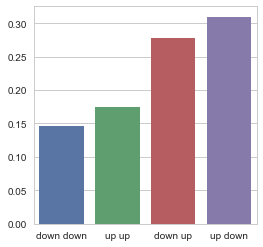

no


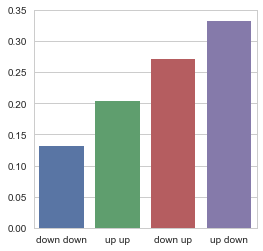

university


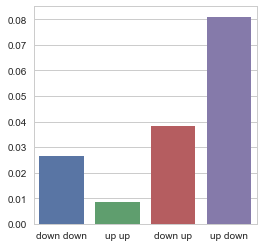

their


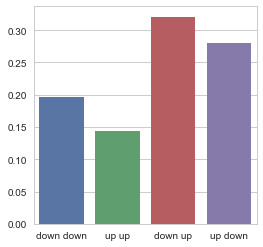

best


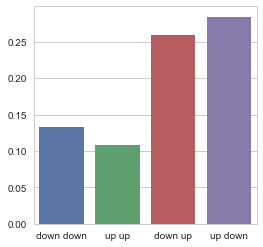

general


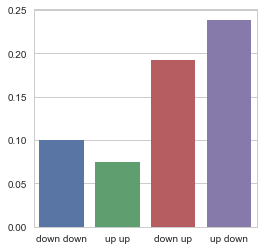

can


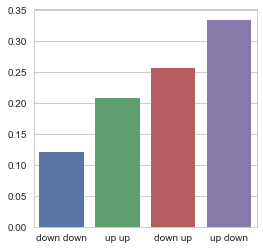

public


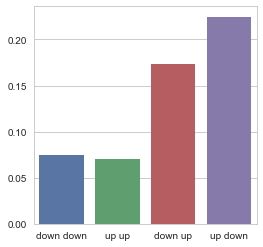

and


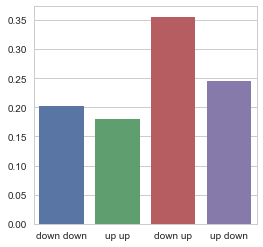

of


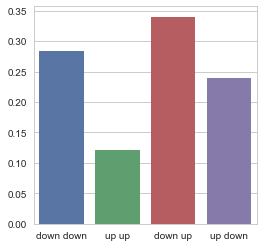

said


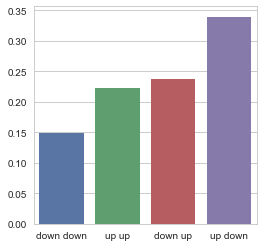

make


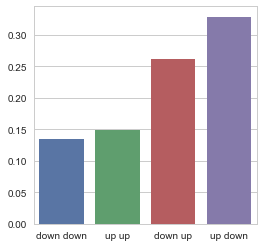

on


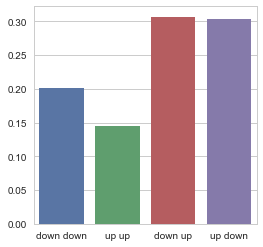

or


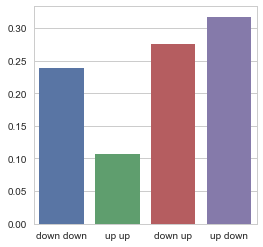

will


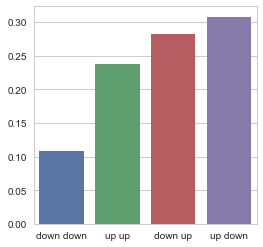

also


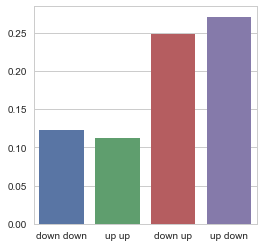

any


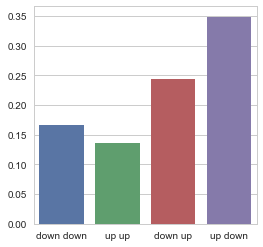

online


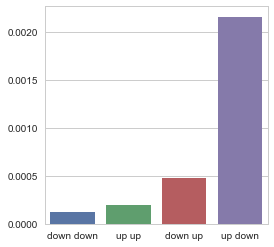

user


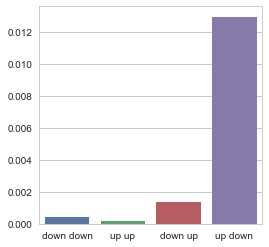

pm


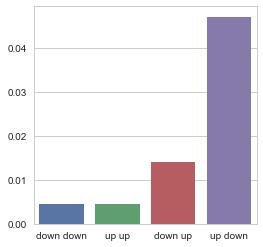

In [31]:
for t, c in tc.items():
    
    counts = np.array(c)

    dirs = OrderedDict([
        ('down down', sum([1 for c in counts if c[0] > c[1] and c[1] > c[2]]) / len(counts)),
        ('up up', sum([1 for c in counts if c[0] < c[1] and c[1] < c[2]]) / len(counts)),
        ('down up', sum([1 for c in counts if c[0] > c[1] and c[1] < c[2]]) / len(counts)),
        ('up down', sum([1 for c in counts if c[0] < c[1] and c[1] > c[2]]) / len(counts)),
    ])
    
    print(t)

    plt.figure(figsize=(4,4))

    sns.barplot(
        x=list(dirs.keys()),
        y=list(dirs.values()),
    )
    
    plt.show()

In [22]:
def plot_dirs(token):
    
    counts = [
        np.array(novel['counts'][token])
        for novel in ds.novels()
        if sum(novel['counts'][token])
    ]

    dirs = OrderedDict([
        ('down down', sum([1 for c in counts if c[0] > c[1] and c[1] > c[2]]) / len(counts)),
        ('up up', sum([1 for c in counts if c[0] < c[1] and c[1] < c[2]]) / len(counts)),
        ('down up', sum([1 for c in counts if c[0] > c[1] and c[1] < c[2]]) / len(counts)),
        ('up down', sum([1 for c in counts if c[0] < c[1] and c[1] > c[2]]) / len(counts)),
    ])

    plt.figure(figsize=(4,4))

    sns.barplot(
        x=list(dirs.keys()),
        y=list(dirs.values()),
    )

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

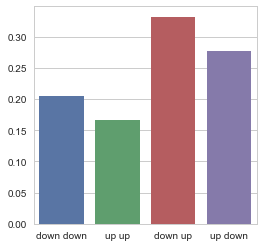

In [23]:
plot_dirs('was')